In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  from scipy.stats import gaussian_kde


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML-Project-(4-1)/insurance.csv')

In [ ]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().any()

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in ['sex','smoker','region']:
  data[i]=le.fit_transform(data[i])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


##UniVariant Analysis

Text(0.5, 0, 'Age')

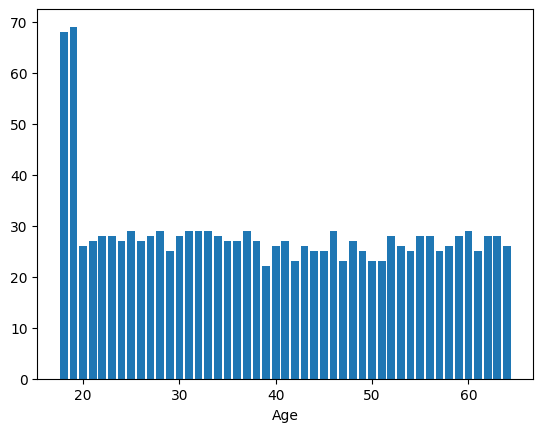

In [ ]:
plt.bar(data['age'].unique(),data['age'].value_counts())
plt.xlabel('Age')

Text(0, 0.5, 'Smoker')

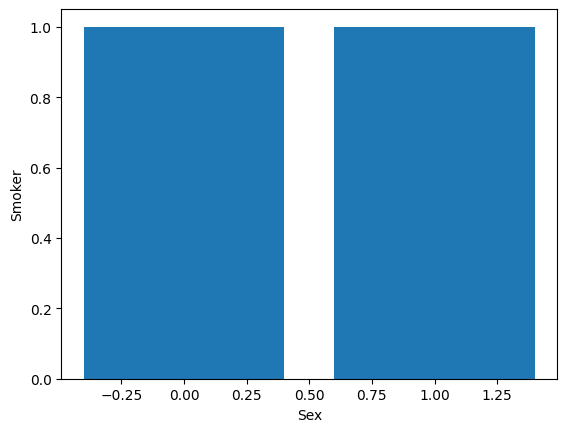

In [ ]:
plt.bar(data['sex'],data['smoker'])
plt.xlabel('Sex')
plt.ylabel('Smoker')


Text(0.5, 0, 'Age')

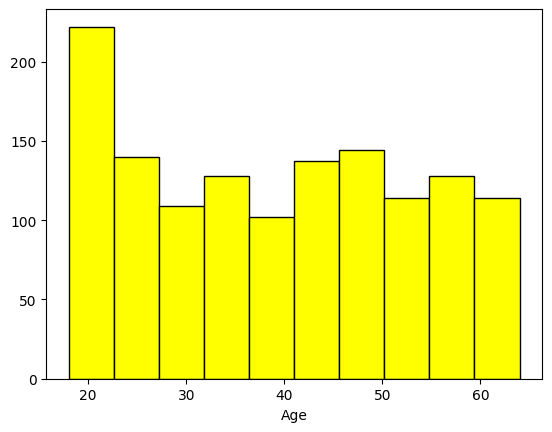

In [ ]:
plt.hist(data['age'],color='yellow',edgecolor='black',bins=10)
plt.xlabel('Age')

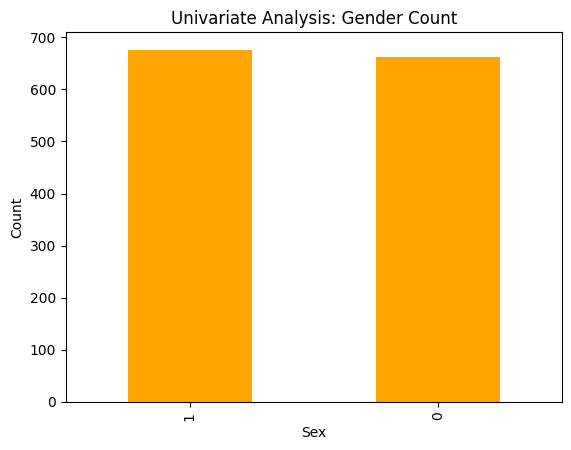

In [ ]:
data['sex'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Univariate Analysis: Gender Count')
plt.show()

##BiVariant

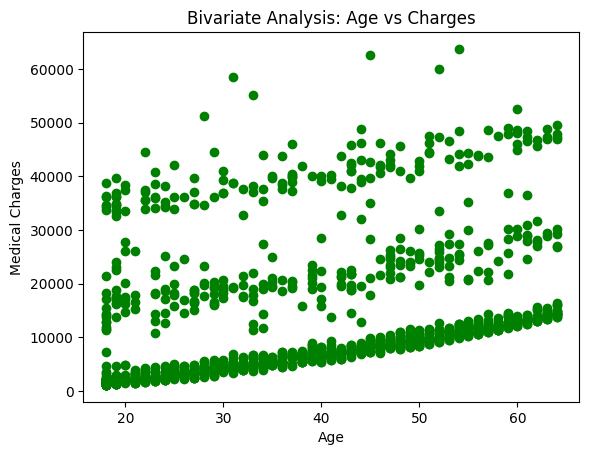

In [ ]:
plt.scatter(data['age'], data['charges'], color='green')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.title('Bivariate Analysis: Age vs Charges')
plt.show()

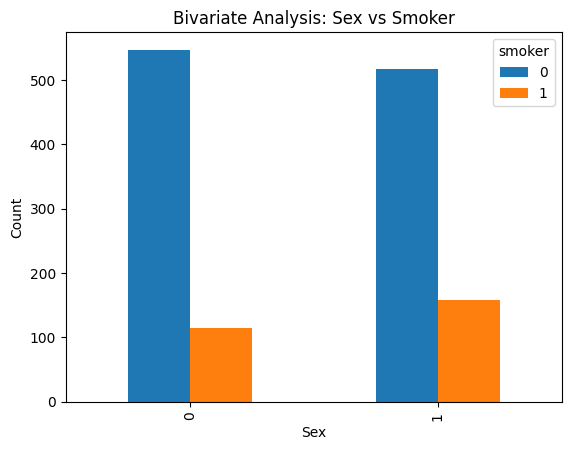

In [ ]:
smoker_counts = data.groupby(['sex', 'smoker']).size().unstack()
smoker_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bivariate Analysis: Sex vs Smoker')
plt.show()

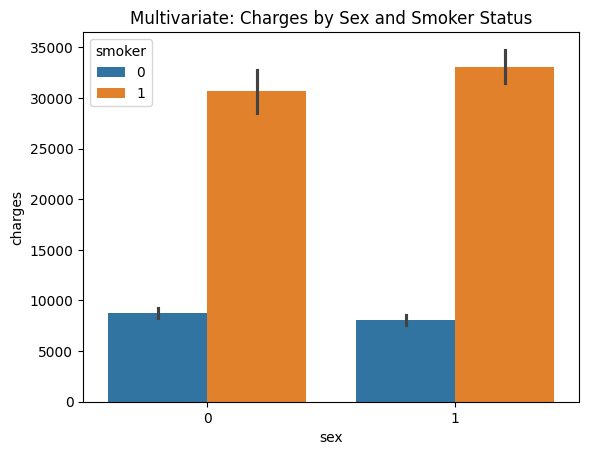

In [ ]:
sns.barplot(x='sex', y='charges', hue='smoker', data=data)
plt.title('Multivariate: Charges by Sex and Smoker Status')
plt.show()

<Axes: >

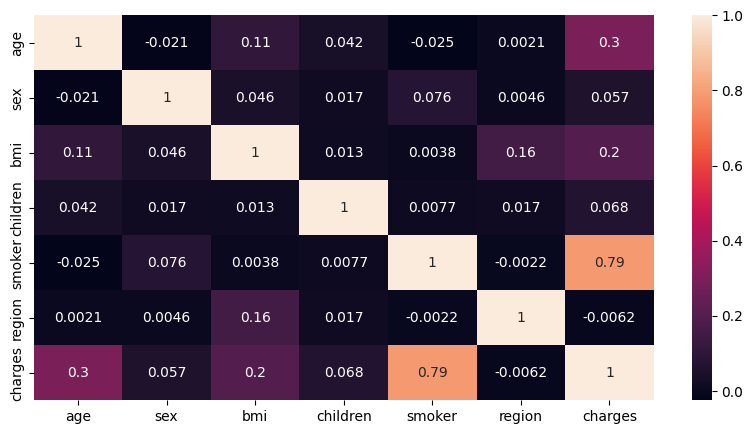

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop('charges',axis=1)
y=data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,0,19.95,2,0,1
1285,47,0,24.32,0,0,0
1142,52,0,24.86,0,0,2
969,39,0,34.32,5,0,2
486,54,0,21.47,3,0,1


In [ ]:
y_train.head()

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130


In [ ]:
X_train.shape

(1070, 6)

In [ ]:
y_train.shape

(1070,)

In [ ]:
X_test.shape

(268, 6)

In [ ]:
y_test.shape

(268,)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
dicto=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [ ]:
dicto

,Actual,Predicted
764,9095.06825,9229.021102
887,5272.17580,6309.758153
890,29330.98315,13886.121499
1293,9301.89355,9567.208759
259,33750.29180,1996.684813
...,...,...
109,47055.53210,13545.614183
575,12222.89830,12084.950450
535,6067.12675,7103.589736
543,63770.42801,11388.340731


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
model_s=r2_score(y_test,y_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model1=RandomForestRegressor(n_estimators=100)

In [ ]:
model1.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred1=model1.predict(X_test)

In [ ]:
dicto1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})

In [ ]:
dicto1

,Actual,Predicted
764,9095.06825,11364.250987
887,5272.17580,5119.032234
890,29330.98315,28202.737782
1293,9301.89355,9869.780234
259,33750.29180,34691.350782
...,...,...
109,47055.53210,47477.270192
575,12222.89830,12842.746556
535,6067.12675,6350.673360
543,63770.42801,46719.551845


In [ ]:
mode1_s=r2_score(y_test,y_pred1)

In [ ]:
import pickle

In [ ]:
pickle.dump(model1,open('model.pkl','wb'))